In [16]:

# Data -----------------------------------------------------------------
import pandas as pd
import numpy as np
# Graphics -------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning -----------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             r2_score,
                             root_mean_squared_error)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import (OneHotEncoder,
                                   MinMaxScaler,
                                  )
from sklearn.inspection import permutation_importance

In [ ]:
import pandas as pd

file_path = "/workspaces/Mexico_Realestatedata/Maxico-real-estate-clean dataset.csv"
df_raw = pd.read_csv(file_path, encoding='ISO-8859-1')



In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1736 non-null   int64  
 1   property_type  1736 non-null   object 
 2   state          1736 non-null   object 
 3   lat            1736 non-null   float64
 4   lon            1736 non-null   float64
 5   area_m2        1736 non-null   int64  
 6   price_usd      1736 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 95.1+ KB


In [7]:
df_raw.head(5)

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd
0,1,house,Estado de Mxico,19.560181,-99.233528,150,"$67,965.56"
1,2,house,Nuevo Len,25.688436,-100.198807,186,"$63,223.78"
2,3,apartment,Guerrero,16.767704,-99.764383,82,"$84,298.37"
3,4,apartment,Guerrero,16.829782,-99.911012,150,"$94,308.80"
4,5,house,Yucatn,21.052583,-89.538639,205,"$105,191.37"


In [10]:
df_interim = (
    df_raw
    .copy()
    .set_axis(
        df_raw.columns.str.replace(' ', '_')
        .str.replace(r'\W','',regex=True) 
        .str.lower() 
        .str.slice(0,40), axis=1, 
    )
    .rename(columns={'price_usd':'target'})
    .iloc[:,1:]
    .astype({"property_type": "category", "state": "category"})


)
df_interim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   property_type  1736 non-null   category
 1   state          1736 non-null   category
 2   lat            1736 non-null   float64 
 3   lon            1736 non-null   float64 
 4   area_m2        1736 non-null   int64   
 5   target         1736 non-null   object  
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 59.2+ KB


In [11]:
df = (
    df_interim
    .copy()
    .reindex(
        columns=(
            ['target'] +
            [c for c in df_interim.columns.to_list() if c not in ['target']]
        )
    )
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   target         1736 non-null   object  
 1   property_type  1736 non-null   category
 2   state          1736 non-null   category
 3   lat            1736 non-null   float64 
 4   lon            1736 non-null   float64 
 5   area_m2        1736 non-null   int64   
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 59.2+ KB


In [13]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,
                                     random_state=2024,
                                     test_size=0.2)
df_train = df_train.reset_index(drop=True).sort_values(by='target')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 536 to 299
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   target         1388 non-null   object  
 1   property_type  1388 non-null   category
 2   state          1388 non-null   category
 3   lat            1388 non-null   float64 
 4   lon            1388 non-null   float64 
 5   area_m2        1388 non-null   int64   
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 58.3+ KB


In [14]:
display(df_train.describe(include='category').T)
display(df_train.describe().T)

,count,unique,top,freq
property_type,1388,2,house,1064
state,1388,30,Distrito Federal,241


,count,mean,std,min,25%,50%,75%,max
lat,1388.0,20.751117,2.710393,16.228815,19.274701,19.592709,21.075163,32.665619
lon,1388.0,-98.805027,4.785581,-117.054763,-100.389888,-99.203238,-98.247180,-86.812320
area_m2,1388.0,170.658501,80.630009,60.000000,104.000000,156.500000,220.000000,385.000000


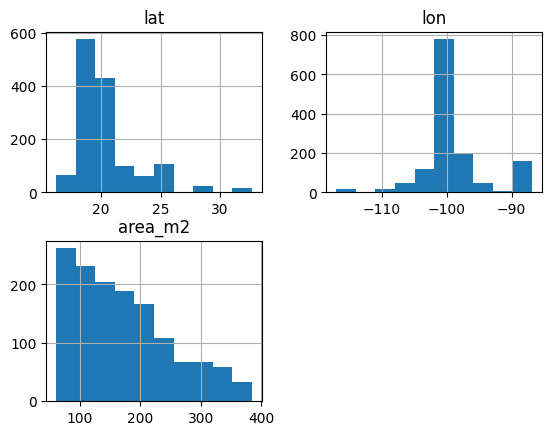

In [17]:
df_train.hist()
plt.show()

<Axes: xlabel='lon'>

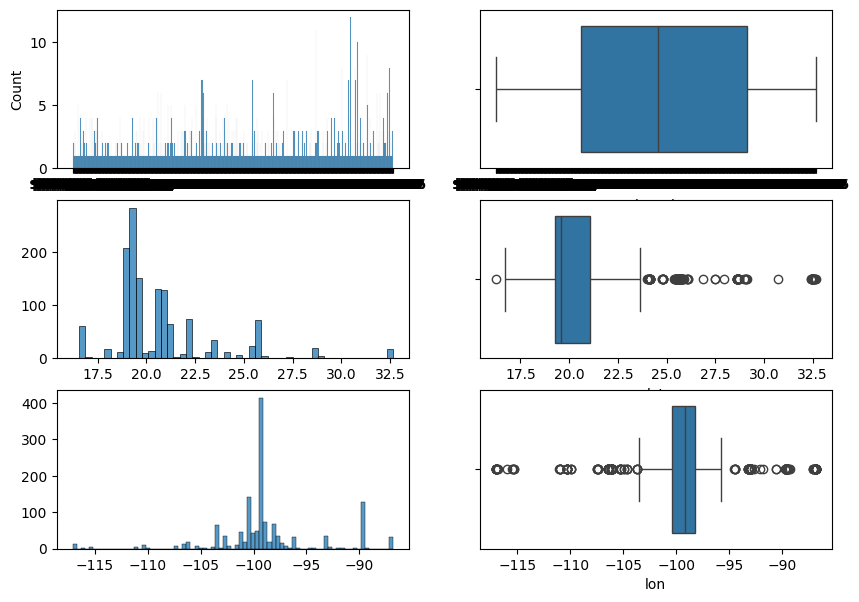

In [18]:
fig, axis = plt.subplots(3, 2, figsize = (10, 7))
sns.histplot(ax = axis[0, 0], data = df_train, x= "target").set(xlabel = None)
sns.boxplot(ax = axis[0, 1], data = df_train, x = "target")
sns.histplot(ax = axis[1, 0], data = df_train, x = "lat").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df_train, x = "lat")
sns.histplot(ax = axis[2, 0], data = df_train, x = "lon").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[2, 1], data = df_train, x = "lon")